In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Function to prepare data for modeling
def get_data():
    df = pd.read_csv("ecommerce_data.csv")
    data = df.to_numpy()
    np.random.shuffle(data)

    X = data[:,:-1]
    Y = data[:,-1].astype(np.int32)

    N,D = X.shape
    X2 = np.zeros((N,D+3))
    X2[:,:D-1] = X[:,:D-1]

    for n in range(N):
        t = int(X[n , D-1])
        X2[n , t + D - 1] = 1
        
    X = X2
    Xtrain = X[:-100]
    Ytrain = Y[:-100]

    Xtest = X[-100:]
    Ytest = Y[-100:]

    for i in (1,2):
        m = Xtrain[: , i].mean()
        s = Xtrain[: , i].std()
        Xtrain[: , i] = (Xtrain[: , i] - m)/s
        Xtest[: , i] = (Xtest[: , i] - m)/s
    return Xtrain,Ytrain,Xtest,Ytest

In [3]:
# Function to transform targets matrix into an indicator matrix
def y2indicator(Y,K):
    N = len(Y)
    I = np.zeros((N,K))
    for i in range(N):
        I[i][Y[i]] = 1
    return I

In [4]:
Xtrain,Ytrain,Xtest,Ytest = get_data()

In [5]:
N = Xtrain.shape[0] #Number of elemets
D = Xtrain.shape[1] #Number of input features
M = 8 #Size of hidder layer
K = len(set(Ytrain) | set(Ytest)) #Number of classes

In [6]:
Ytrain_ind = y2indicator(Ytrain,K)
Ytest_ind = y2indicator(Ytest,K)

In [7]:
# Randomly initialize weights

W1 = np.random.randn(D,M)
b1 = np.random.randn(M)
W2 = np.random.randn(M,K)
b2 = np.random.randn(K)



In [8]:
def softmax(A):
    expA = np.exp(A)
    return expA/np.sum(expA,axis=1, keepdims = True)

In [9]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

In [10]:
def forward(X,W1,b1,W2,b2):
    Z = sigmoid(X.dot(W1) + b1)
    A = Z.dot(W2) + b2
    return softmax(A), Z

In [11]:
def cost(Yind, P):
    tot = Yind * np.log(P)
    return tot.sum()

In [12]:
def classification_rate(Y,P):
    n_correct = 0
    n_total = len(P)
    for i in range(len(Y)):
        if np.argmax(Y[i]) == np.argmax(P[i]):
            n_correct += 1
    return n_correct / n_total

In [13]:
learning_rate = 10e-3
costs = []

for epoch in range(1000):
    Y_hat , Z = forward(Xtrain,W1,b1,W2,b2)

    #Calculate the derivatives of the Log-Likelihood:
    grad_W1 = Xtrain.T.dot(((Ytrain_ind - Y_hat).dot(W2.T)* Z *(1 - Z)))
    grad_b1 = np.sum(((Ytrain_ind - Y_hat).dot(W2.T) * Z * (1 - Z)),axis = 0)
    grad_W2 = Z.T.dot(Ytrain_ind - Y_hat)
    grad_b2 = np.sum(Ytrain_ind - Y_hat, axis = 0)

    #Update Variables
    W1 += learning_rate * grad_W1
    b1 += learning_rate * grad_b1
    W2 += learning_rate * grad_W2
    b2 += learning_rate * grad_b2

    if epoch % 10 == 0:
        costs.append(cost(Ytrain_ind,Y_hat))
        print(f"Cost: {cost(Ytrain_ind,Y_hat)} ---- Accuracy: {classification_rate(Ytrain_ind,Y_hat)}")

Cost: -760.0626299790554 ---- Accuracy: 0.1475
Cost: -243.27021656304157 ---- Accuracy: 0.775
Cost: -193.77843704457985 ---- Accuracy: 0.78
Cost: -148.1161819748802 ---- Accuracy: 0.8525
Cost: -127.9413524934361 ---- Accuracy: 0.8875
Cost: -115.04410911143289 ---- Accuracy: 0.905
Cost: -105.23786850351654 ---- Accuracy: 0.9125
Cost: -97.46641037786927 ---- Accuracy: 0.9225
Cost: -91.09428622250834 ---- Accuracy: 0.935
Cost: -85.6539584981182 ---- Accuracy: 0.94
Cost: -80.81021815995899 ---- Accuracy: 0.9425
Cost: -76.34540994046526 ---- Accuracy: 0.945
Cost: -72.16446995038211 ---- Accuracy: 0.9475
Cost: -68.2800979192535 ---- Accuracy: 0.945
Cost: -64.73345127431769 ---- Accuracy: 0.945
Cost: -61.520593646693754 ---- Accuracy: 0.95
Cost: -58.60082355904303 ---- Accuracy: 0.95
Cost: -55.932325944060395 ---- Accuracy: 0.95
Cost: -53.48458442676996 ---- Accuracy: 0.9525
Cost: -51.23604697993359 ---- Accuracy: 0.955
Cost: -49.1697853608973 ---- Accuracy: 0.9575
Cost: -47.27056008819305 --

In [14]:
#Classification rate on test data (Unseen Data)

classification_rate(Ytest_ind,forward(Xtest,W1,b1,W2,b2)[0])

0.95

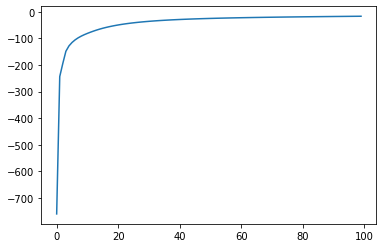

In [15]:
#Plotting Cost as function of epochs

plt.plot(costs)